In [5]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 
import statistics

In [6]:
def extract_data(filename):
    df = pandas.read_csv(filename)
    ydata = df.T1.values 
    udata = df.Q1.values 
    return ydata, udata

In [7]:
def ARX(filename):
    ydata, udata = extract_data(filename)
    ARX_results = sm.tsa.AR(ydata).fit()
    y_arx = ARX_results.predict()
    t_arx = numpy.arange(len(y_arx))
    return y_arx, t_arx

In [8]:
def Results(filename):
    y_arx, t_arx = ARX(filename)
    df = pandas.read_csv(filename)
    plt.plot(df.Time, df.T1, '.', label = 'observation')
    plt.plot(t_arx, y_arx, label = 'ARX prediction')
    plt.ylabel('Temperature 1 (degress celcius)')
    plt.xlabel('Time (s)')
    plt.title(filename)
    plt.legend()
    plt.show()

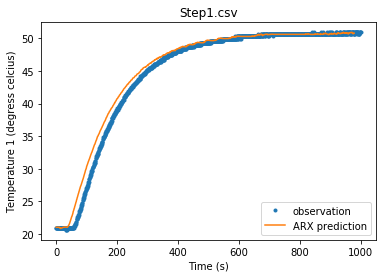

In [9]:
Results('Step1.csv')

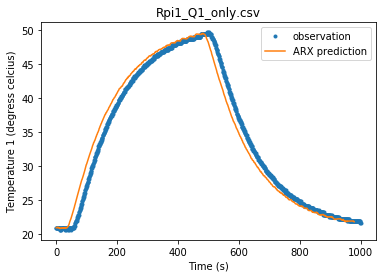

In [10]:
Results("Rpi1_Q1_only.csv")

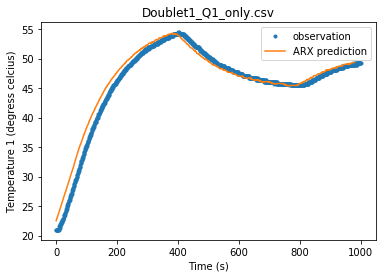

In [11]:
Results("Doublet1_Q1_only.csv")

## Calculating the error

In [27]:
def error(filename):
    ydata, udata = extract_data(filename)
    y_arx, t_arx = ARX(filename)
    ϵ = (ydata[:len(y_arx)] - y_arx)**2
    standard_deviation = statistics.stdev(ydata)
    print(standard_deviation)
    degree_deviation = ydata / standard_deviation
    plt.subplot(3,1,1)
    plt.plot(t_arx, numpy.sqrt(ϵ), label = '(y_measure - y_predict)**2')
    plt.xlabel('time')
    plt.ylabel('error')
    plt.legend()
    plt.subplot(3,1,2)
    plt.plot(t_arx, udata[:len(y_arx)], label = 'Input')
    plt.xlabel('time')
    plt.ylabel('input data')
    plt.legend()
    plt.subplot(3,1,3)
    plt.plot(degree_deviation[:len(y_arx)], ϵ, label = 'deg_dev = y_measured/standard deviation')
    plt.xlabel('Degree of deviation ')
    plt.ylabel('error')
    plt.legend()

9.170318136395101


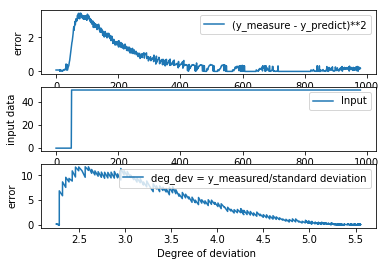

In [28]:
error('Step1.csv')

10.169909694904543


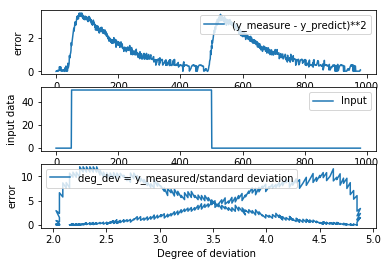

In [29]:
error('Rpi1_Q1_only.csv')

7.2629017560504465


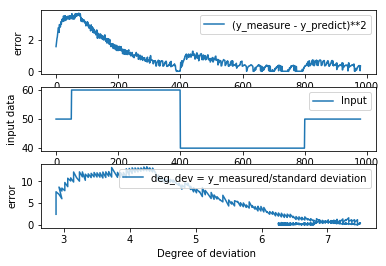

In [30]:
error('Doublet1_Q1_only.csv')